In [60]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
cd C:\Users\SATHAKI PROSAD\Desktop

C:\Users\SATHAKI PROSAD\Desktop


In [62]:
gl = pd.read_csv('glass.csv')

In [63]:
gl

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,2
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,2
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,2
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,2


In [64]:
gl.shape

(214, 10)

In [65]:
gl.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [66]:
gl.isnull().sum()# so no null values present in the dataset

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [67]:
#checking tha value counts of each column
for i in gl.columns:
    print(gl[i].value_counts())
    print("\n")
# no blanks in any column    


1.52152    3
1.51645    3
1.51590    3
1.52213    2
1.51763    2
          ..
1.51800    1
1.51750    1
1.51665    1
1.51736    1
1.53125    1
Name: RI, Length: 178, dtype: int64


13.00    5
13.02    5
13.21    5
12.85    4
13.64    4
        ..
13.60    1
12.62    1
12.35    1
13.90    1
13.99    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.54     8
3.48     8
3.58     8
3.52     7
        ..
2.72     1
3.86     1
3.46     1
3.15     1
3.75     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.29    5
1.43    5
1.23    5
       ..
1.94    1
0.58    1
0.91    1
1.61    1
1.86    1
Name: Al, Length: 118, dtype: int64


72.86    4
73.28    4
73.10    4
72.99    4
73.11    4
        ..
73.72    1
72.55    1
73.46    1
72.44    1
72.14    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.60    11
0.56    11
0.58    10
        ..
0.18     1
1.10     1
0.32     1
0.48     1
0.50     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.44    

<AxesSubplot:ylabel='Frequency'>

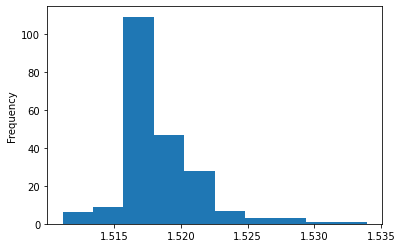

In [68]:
gl['RI'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

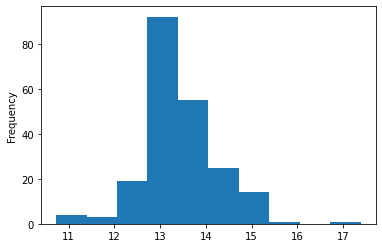

In [69]:
gl['Na'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

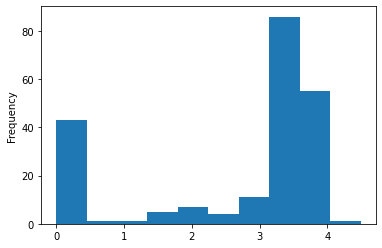

In [70]:
gl['Mg'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

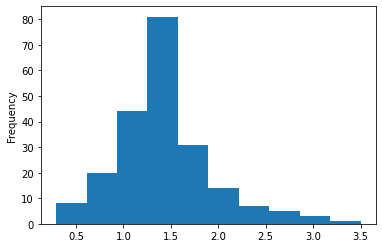

In [71]:
gl['Al'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

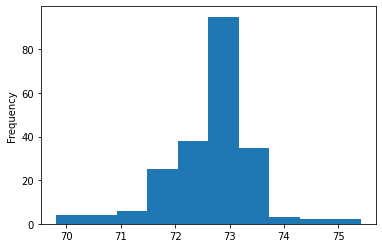

In [72]:
gl['Si'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

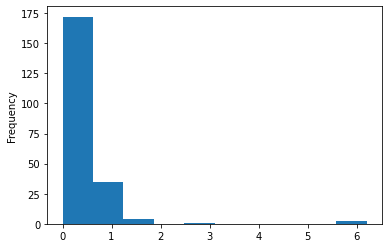

In [73]:
gl['K'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

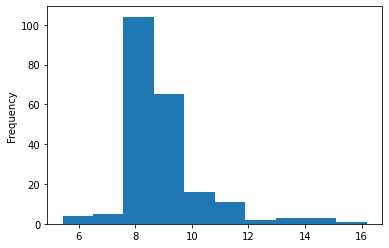

In [74]:
gl['Ca'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

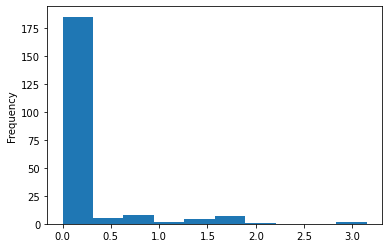

In [75]:
gl['Ba'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

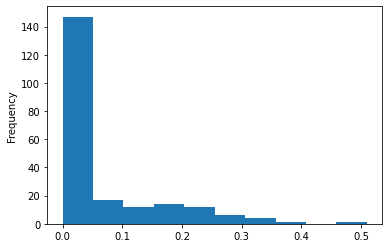

In [76]:
gl['Fe'].plot.hist()

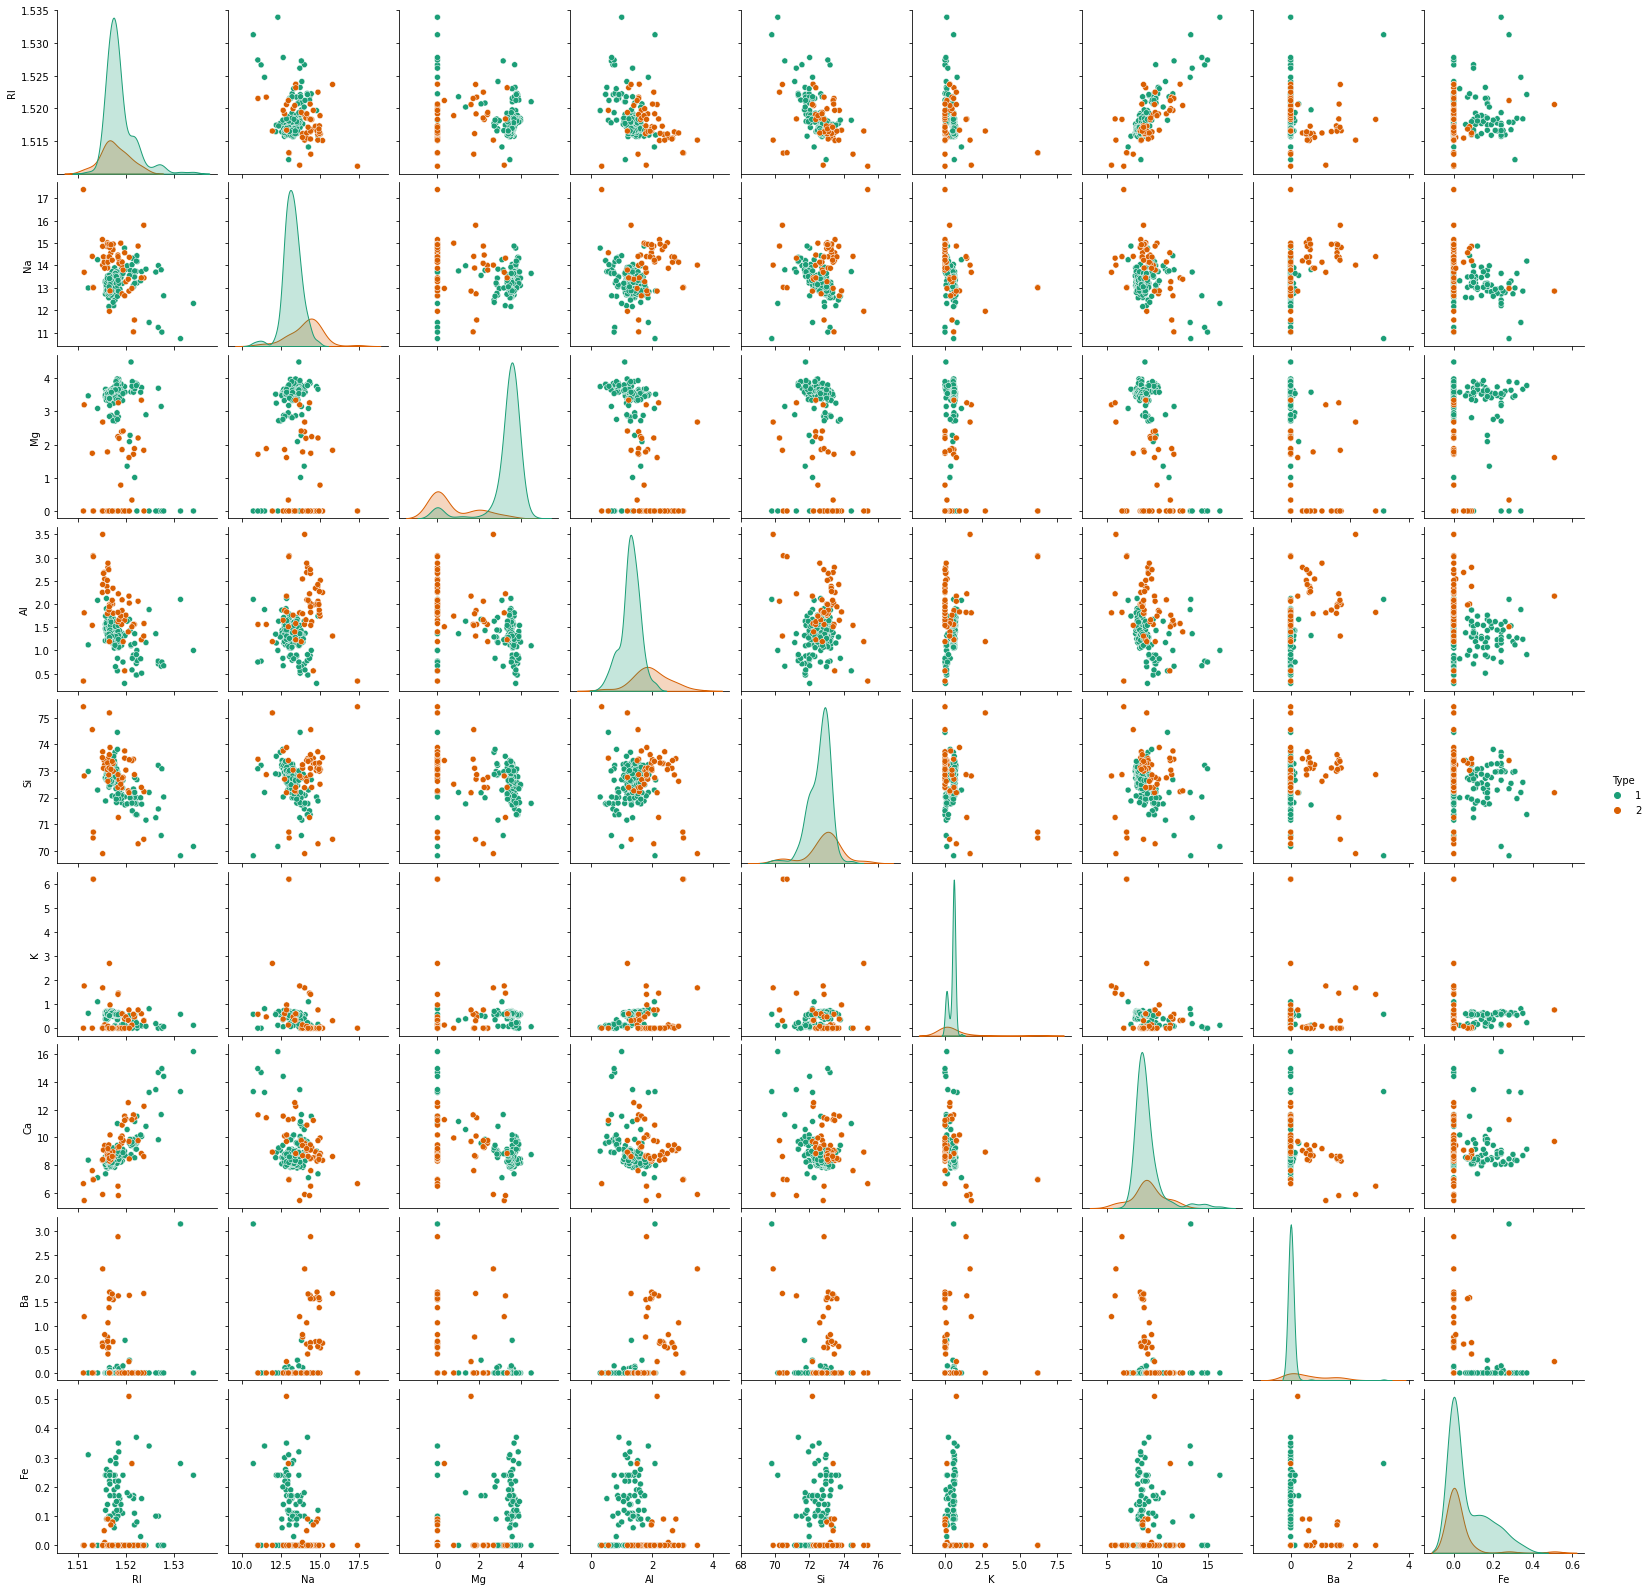

In [77]:
sns.pairplot(gl,hue="Type",palette="Dark2")
plt.show()

In [78]:
corr=gl.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.134327
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.452336
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.758289
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.585928
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.148072
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,0.053774
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.040670
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.523403
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.194903
Type,-0.134327,0.452336,-0.758289,0.585928,0.148072,0.053774,0.040670,0.523403,-0.194903,1.000000


In [79]:
#ca and Ri has multicollinearity but ca and ri are important variable so they cannot be removed.

In [80]:
gl.skew()# skewness range is between -0.5 to +0.5

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.237086
dtype: float64

In [81]:
# except na all the variables have skewsness so it need to be removed

In [82]:
gl["RI"]=np.cbrt(gl["RI"])

In [83]:
gl["Mg"]=np.cbrt(gl["Mg"])

In [84]:
gl["Al"]=np.cbrt(gl["Al"])

In [85]:
gl["Si"]=np.cbrt(gl["Si"])

In [86]:
gl["K"]=np.cbrt(gl["K"])

In [87]:
gl["Ca"]=np.cbrt(gl["Ca"])

In [88]:
gl["Ba"]=np.cbrt(gl["Ba"])

In [89]:
gl["Fe"]=np.cbrt(gl["Fe"])

In [90]:
cor=gl.corr() # some variables have multicollinearity but cannot be removed as all the variables are important for prediction
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191810,-0.113648,-0.418036,-0.542400,-0.211934,0.802869,-0.092651,0.132621,-0.134457
Na,-0.191810,1.000000,-0.277849,0.077449,-0.070672,-0.539820,-0.264986,0.418626,-0.196921,0.452336
Mg,-0.113648,-0.277849,1.000000,-0.375748,-0.168940,0.442902,-0.398712,-0.548170,0.094472,-0.702022
Al,-0.418036,0.077449,-0.375748,1.000000,0.030066,0.119934,-0.287665,0.509187,-0.054623,0.521192
Si,-0.542400,-0.070672,-0.168940,0.030066,1.000000,-0.171894,-0.191018,-0.007427,-0.077870,0.145719
K,-0.211934,-0.539820,0.442902,0.119934,-0.171894,1.000000,-0.352345,-0.350932,0.119291,-0.389353
Ca,0.802869,-0.264986,-0.398712,-0.287665,-0.191018,-0.352345,1.000000,-0.148226,0.116880,0.031986
Ba,-0.092651,0.418626,-0.548170,0.509187,-0.007427,-0.350932,-0.148226,1.000000,-0.035721,0.599029
Fe,0.132621,-0.196921,0.094472,-0.054623,-0.077870,0.119291,0.116880,-0.035721,1.000000,-0.220775
Type,-0.134457,0.452336,-0.702022,0.521192,0.145719,-0.389353,0.031986,0.599029,-0.220775,1.000000


<AxesSubplot:>

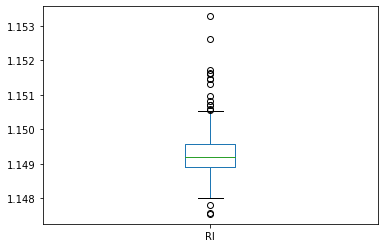

In [91]:
gl["RI"].plot.box() # checking outliers

<AxesSubplot:>

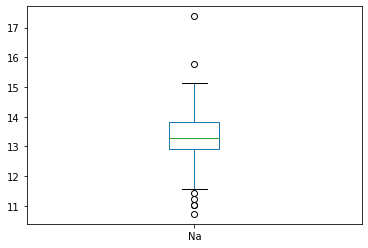

In [92]:
gl["Na"].plot.box()

<AxesSubplot:>

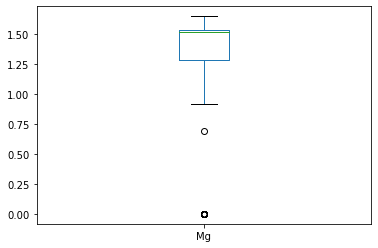

In [93]:
gl["Mg"].plot.box()

<AxesSubplot:>

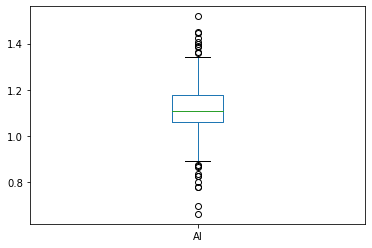

In [94]:
gl["Al"].plot.box()

<AxesSubplot:>

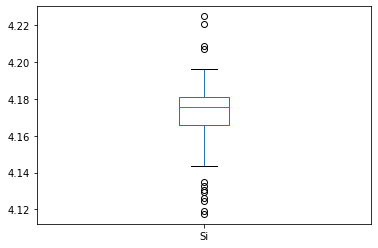

In [95]:
gl["Si"].plot.box()

<AxesSubplot:>

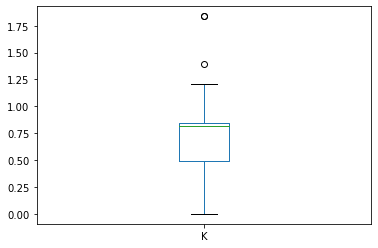

In [96]:
gl["K"].plot.box()

<AxesSubplot:>

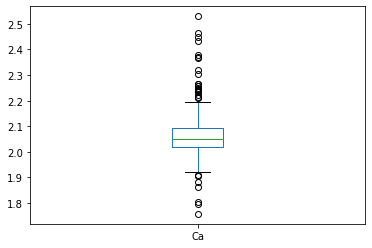

In [97]:
gl["Ca"].plot.box()

<AxesSubplot:>

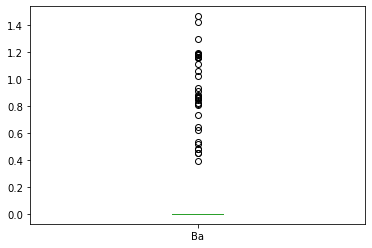

In [98]:
gl["Ba"].plot.box()

<AxesSubplot:>

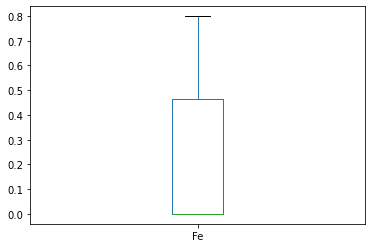

In [99]:
gl["Fe"].plot.box()

In [100]:
x = gl.drop('Type', axis=1).copy()
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.150034,13.64,1.649740,1.032280,4.155926,0.391487,2.060643,0.000000,0.0
1,1.149176,13.89,1.532619,1.107932,4.174180,0.782974,1.985732,0.000000,0.0
2,1.148815,13.53,1.525490,1.154800,4.179148,0.730614,1.981496,0.000000,0.0
3,1.149189,13.21,1.545286,1.088587,4.171883,0.829134,2.018168,0.000000,0.0
4,1.149129,13.27,1.535452,1.074337,4.180865,0.819321,2.005816,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.148828,14.14,0.000000,1.422757,4.171883,0.430887,2.093860,1.019613,0.0
210,1.148985,14.92,0.000000,1.257818,4.180484,0.000000,2.032793,1.167165,0.0
211,1.149943,14.36,0.000000,1.264107,4.187339,0.000000,2.036014,1.179274,0.0
212,1.148899,14.38,0.000000,1.247194,4.190948,0.000000,2.039226,1.162251,0.0


In [101]:
y = gl['Type'].copy()
y

0      1
1      1
2      1
3      1
4      1
      ..
209    2
210    2
211    2
212    2
213    2
Name: Type, Length: 214, dtype: int64

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#SCALING TECHNIQUE
#STANDARD SCALE MEAN 0 AND SD+-1 MAX MIN SCALE 0 to 1
#formula=x-mean/SD

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 0.87395775,  0.28495326,  0.75903197, ..., -0.1076568 ,
        -0.43946868, -0.67938074],
       [-0.24897651,  0.59181718,  0.56383463, ..., -0.84157291,
        -0.43946868, -0.67938074],
       [-0.72177051,  0.14993314,  0.55195394, ..., -0.88307175,
        -0.43946868, -0.67938074],
       ...,
       [ 0.75513809,  1.16872135, -1.99047545, ..., -0.34894585,
         2.74957913, -0.67938074],
       [-0.61263783,  1.19327046, -1.99047545, ..., -0.3174833 ,
         2.7035452 , -0.67938074],
       [-0.41425532,  1.00915211, -1.99047545, ..., -0.20813727,
         2.76890717, -0.67938074]])

In [110]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8
0,0.873958,0.284953,0.759032,-0.634449,-1.124991,-0.835901,-0.107657,-0.439469,-0.679381
1,-0.248977,0.591817,0.563835,-0.057329,0.105556,0.346205,-0.841573,-0.439469,-0.679381
2,-0.721771,0.149933,0.551954,0.300216,0.440468,0.188105,-0.883072,-0.439469,-0.679381
3,-0.232451,-0.242853,0.584946,-0.204901,-0.049288,0.485589,-0.523791,-0.439469,-0.679381
4,-0.311778,-0.169205,0.568556,-0.313611,0.556214,0.455958,-0.644800,-0.439469,-0.679381
...,...,...,...,...,...,...,...,...,...
209,-0.705234,0.898681,-1.990475,2.344370,-0.049288,-0.716931,0.217776,2.317817,-0.679381
210,-0.500215,1.856097,-1.990475,1.086101,0.530501,-2.018006,-0.380508,2.716835,-0.679381
211,0.755138,1.168721,-1.990475,1.134079,0.992620,-2.018006,-0.348946,2.749579,-0.679381
212,-0.612638,1.193270,-1.990475,1.005054,1.235907,-2.018006,-0.317483,2.703545,-0.679381


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [127]:
lg=LogisticRegression()

In [128]:
lg.fit(x_train,y_train)

LogisticRegression()

In [129]:
pred=lg.predict(x_test)

In [130]:
accuracy_score(y_test,pred)

0.9767441860465116

In [131]:
print(confusion_matrix(y_test,pred))

[[28  0]
 [ 1 14]]


In [132]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      0.93      0.97        15

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.97        43
weighted avg       0.98      0.98      0.98        43

